# --------------------------------------- Workshop #3 -------------------------------------


* This workshop includes marked tasks that comprise 25% of your final mark in this module. 

* You need to read the examples in the 'Lecture #3 - examples' notebook to complete the tasks. 

# Task

## TASK 3.1: Apply four classifiers discussed in Lecture #3, i.e. Support Vector Machine (SVM), Decision Tree (DT), Random Forest (RF), and K-nearest neighbours (KNN) classifiers to the adult_WS#3 dataset available on Canvas to predict the income column. Calculate the confusion matrix and evaluation metrics for all classifiers. Plot the features' importance values, determine the three most important features (i.e. columns) which have the highest impact on the income and report them in the report cell  (25%). 

## NOTE1: To decrease the processing time, use an ordinal encoder for both nominal and ordinal input columns. You don't need to apply the one hot encoder to nominal columns. 

## NOTE2 You are expected to improve your models in any way possible to get as high accuracy as possible.

## NOTE3: You should add comments on your code wherever necessary and briefly explain what the code is doing

## NOTE4: Completing the report cell is required only for reporting the three most important features. Other explanations are optional. 

## NOTE5: You will still get some marks if your code doesn't run, but you have written some codes and have added comments on the code. 


In [1]:
import pandas as pd;pd.set_option('display.max_columns', None)
import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score, 
                            confusion_matrix, classification_report, roc_auc_score)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

In [2]:
adult_WS_data = pd.read_csv('adult_WS#3.csv')
adult_WS_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,29,Private,216481,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
1,36,Private,280570,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
2,25,?,100903,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States,<=50K
3,47,Private,145636,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,>50K
4,33,Private,119422,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K


In [3]:
#view dimension of data
adult_WS_data.shape

(10000, 15)

In [4]:
#summary statistics
adult_WS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   workclass       9825 non-null   object
 2   fnlwgt          10000 non-null  int64 
 3   education       10000 non-null  object
 4   education-num   10000 non-null  int64 
 5   marital-status  10000 non-null  object
 6   occupation      9825 non-null   object
 7   relationship    10000 non-null  object
 8   race            10000 non-null  object
 9   sex             10000 non-null  object
 10  capital-gain    10000 non-null  int64 
 11  capital-loss    10000 non-null  int64 
 12  hours-per-week  10000 non-null  int64 
 13  native-country  9939 non-null   object
 14  income          10000 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB


In [5]:
adult_WS_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,10000.000000,1.000000e+04,10000.000000,10000.00000,10000.000000,10000.000000
mean,38.603400,1.895382e+05,10.071000,1029.02620,90.598900,40.453900
std,13.725842,1.054084e+05,2.564803,6999.48071,411.768551,12.328571
min,17.000000,1.228500e+04,1.000000,0.00000,0.000000,1.000000
25%,28.000000,1.177890e+05,9.000000,0.00000,0.000000,40.000000
50%,37.000000,1.781470e+05,10.000000,0.00000,0.000000,40.000000
75%,48.000000,2.367728e+05,12.000000,0.00000,0.000000,45.000000
max,90.000000,1.366120e+06,16.000000,99999.00000,3770.000000,99.000000


In [6]:
# Select the catergorical variables in dataset
categorical_columns = adult_WS_data.select_dtypes(include='object').columns

for column in categorical_columns:
    # count the occurences of each value in column
    value_counts = adult_WS_data[column].value_counts()
    
    #print values for categorical columns
    print("value counts for column '{}'".format(column))
    print(value_counts)

value counts for column 'workclass'
workclass
Private             6961
Self-emp-not-inc     802
Local-gov            637
?                    407
State-gov            404
Self-emp-inc         333
Federal-gov          274
Without-pay            6
Never-worked           1
Name: count, dtype: int64
value counts for column 'education'
education
HS-grad         3233
Some-college    2236
Bachelors       1644
Masters          549
Assoc-voc        432
11th             339
Assoc-acdm       337
10th             275
7th-8th          208
9th              163
Prof-school      157
12th             145
Doctorate        112
5th-6th           98
1st-4th           56
Preschool         16
Name: count, dtype: int64
value counts for column 'marital-status'
marital-status
Married-civ-spouse       4642
Never-married            3268
Divorced                 1314
Widowed                   332
Separated                 322
Married-spouse-absent     115
Married-AF-spouse           7
Name: count, dtype: int64
val

In [7]:
# Getting the number of Null values for different columns
adult_WS_data.isna().sum()

age                 0
workclass         175
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        175
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country     61
income              0
dtype: int64

Categorical Colunms 'workclass, occupation and native-country' have missing values

In [8]:
# Find the mode of each null categorical column and fill the Null values with the mode
for col in categorical_columns:
    mode = adult_WS_data[col].mode().iloc[0]
    adult_WS_data.loc[adult_WS_data[col].isna(), col] = mode
    
adult_WS_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [9]:
# checking columns for wrong data in dataframe
for i in adult_WS_data.columns:
    print('Unique values of:', i, '\n')
    print(adult_WS_data[i].unique())
    print(100*'-')

Unique values of: age 

[29 36 25 47 33 37 34 38 62 50 64 35 31 19 20 32 28 67 26 17 57 23 52 51
 65 24 45 80 21 56 46 39 30 53 43 27 49 42 40 58 41 22 44 69 18 59 54 60
 55 61 48 63 70 68 90 71 73 74 66 72 75 82 78 81 76 77 88 79 83 84 87]
----------------------------------------------------------------------------------------------------
Unique values of: workclass 

['Private' '?' 'Local-gov' 'Self-emp-inc' 'Federal-gov' 'Self-emp-not-inc'
 'State-gov' 'Without-pay' 'Never-worked']
----------------------------------------------------------------------------------------------------
Unique values of: fnlwgt 

[216481 280570 100903 ... 342709 134724 252253]
----------------------------------------------------------------------------------------------------
Unique values of: education 

['Masters' 'Some-college' 'Bachelors' 'Assoc-voc' 'HS-grad' '12th' '11th'
 '9th' 'Doctorate' 'Assoc-acdm' '10th' '7th-8th' '5th-6th' '1st-4th'
 'Prof-school' 'Preschool']
--------------------------------

Columns 'workclass, occupation and native-country' have incorrect entries '?'
 

In [10]:
# Select the columns which contains wrong data.
selected_columns = ['occupation', 'workclass', 'native-country']

# Write a code to fill the wrong cells with Unknown as value.
adult_WS_data['workclass'].replace('?', 'Unknown', inplace=True)
adult_WS_data['native-country'].replace('?', 'Unknown', inplace=True)
adult_WS_data['occupation'].replace('?', 'Unknown', inplace=True)

print(adult_WS_data.head())


   age workclass  fnlwgt     education  education-num      marital-status  \
0   29   Private  216481       Masters             14  Married-civ-spouse   
1   36   Private  280570  Some-college             10  Married-civ-spouse   
2   25   Unknown  100903     Bachelors             13  Married-civ-spouse   
3   47   Private  145636     Assoc-voc             11  Married-civ-spouse   
4   33   Private  119422       HS-grad              9  Married-civ-spouse   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0    Exec-managerial         Wife  White  Female             0             0   
1       Craft-repair      Husband  White    Male             0             0   
2            Unknown         Wife  White  Female             0             0   
3  Handlers-cleaners      Husband  White    Male             0             0   
4    Exec-managerial      Husband  White    Male             0             0   

   hours-per-week native-country income  
0             

? values in 'occupation', 'workclass', 'native-country' columns have been replaced with 'Unknown' as value

In [11]:
from sklearn.preprocessing import OrdinalEncoder

# Define categorical columns
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 
                       'race', 'sex', 'native-country', 'income']

# Initialize OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Encode each categorical column
ordinal_encoder.fit(adult_WS_data[categorical_columns])
adult_WS_data[categorical_columns] = ordinal_encoder.transform(adult_WS_data[categorical_columns])

In [12]:
adult_WS_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,29,3.0,216481,12.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,37.0,1.0
1,36,3.0,280570,15.0,10,2.0,2.0,0.0,4.0,1.0,0,0,45,37.0,0.0
2,25,7.0,100903,9.0,13,2.0,14.0,5.0,4.0,0.0,0,0,25,37.0,0.0
3,47,3.0,145636,8.0,11,2.0,5.0,0.0,4.0,1.0,0,0,48,37.0,1.0
4,33,3.0,119422,11.0,9,2.0,3.0,0.0,4.0,1.0,0,0,40,37.0,0.0


Numerical values are encoded to The categorical columns (ordinal and nominal features) using the Ordinal Encoder.  The target varible 'income' has now also been assigned binary values

In [13]:
adult_WS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             10000 non-null  int64  
 1   workclass       10000 non-null  float64
 2   fnlwgt          10000 non-null  int64  
 3   education       10000 non-null  float64
 4   education-num   10000 non-null  int64  
 5   marital-status  10000 non-null  float64
 6   occupation      10000 non-null  float64
 7   relationship    10000 non-null  float64
 8   race            10000 non-null  float64
 9   sex             10000 non-null  float64
 10  capital-gain    10000 non-null  int64  
 11  capital-loss    10000 non-null  int64  
 12  hours-per-week  10000 non-null  int64  
 13  native-country  10000 non-null  float64
 14  income          10000 non-null  float64
dtypes: float64(9), int64(6)
memory usage: 1.1 MB


In [14]:
# splitting data into features and target
#Feature Variables
X = adult_WS_data.drop(['income'], axis=1)
#Target Variables
y = adult_WS_data.income

In [15]:
#View feature varibales
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,29,3.0,216481,12.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,37.0
1,36,3.0,280570,15.0,10,2.0,2.0,0.0,4.0,1.0,0,0,45,37.0
2,25,7.0,100903,9.0,13,2.0,14.0,5.0,4.0,0.0,0,0,25,37.0
3,47,3.0,145636,8.0,11,2.0,5.0,0.0,4.0,1.0,0,0,48,37.0
4,33,3.0,119422,11.0,9,2.0,3.0,0.0,4.0,1.0,0,0,40,37.0


In [16]:
#View target variable 'income'
y

0       1.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    1.0
9999    0.0
Name: income, Length: 10000, dtype: float64

In [17]:
#normalising input data

#import nescessary module
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#fit scaler into data
X=scaler.fit_transform(X)

In [18]:
#view scaled data
X

array([[0.16438356, 0.375     , 0.15082783, ..., 0.        , 0.39795918,
        0.925     ],
       [0.26027397, 0.375     , 0.19816669, ..., 0.        , 0.44897959,
        0.925     ],
       [0.10958904, 0.875     , 0.06545702, ..., 0.        , 0.24489796,
        0.925     ],
       ...,
       [0.17808219, 0.375     , 0.24406519, ..., 0.        , 0.39795918,
        0.925     ],
       [0.32876712, 0.625     , 0.09043864, ..., 0.        , 0.39795918,
        0.925     ],
       [0.05479452, 0.375     , 0.17725055, ..., 0.        , 0.39795918,
        0.925     ]])

input features have been normalised and scaled 

In [19]:
# splitting data into training and tests sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
#view split data
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7000, 14) (7000,)
(3000, 14) (3000,)


In [21]:
y

0       1.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    1.0
9999    0.0
Name: income, Length: 10000, dtype: float64

Dataset splitted using ratio 70:30. Training data apportioned 70% and test data 30%

# Support Vector Machine Model Development (SVM)

SVM metrics

True Positives: 367
True Negatives: 2147
False Positives: 133
False Negatives: 353
--------------------------------------------------
Accuracy: 0.84
Mis-Classification: 0.16
Sensitivity: 0.51
Specificity: 0.94
Precision: 0.94
f_1 Score: 0.66





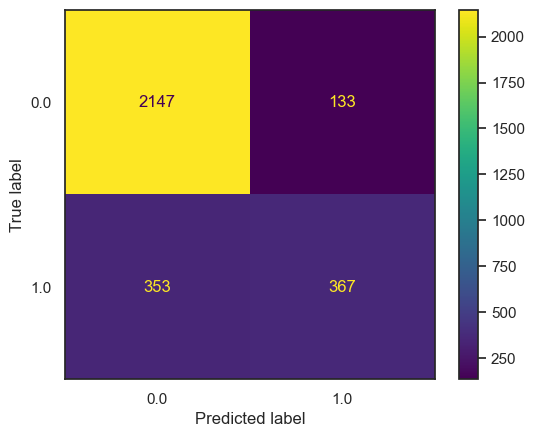

In [22]:
from sklearn import svm

# Initialize SVM model
svm_model = svm.SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred1 = svm_model.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm_svm = confusion_matrix(y_test, y_pred1, labels=svm_model.classes_)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_model.classes_)
disp.plot()

# This function takes the confusion matrix (cm) from the cell above and produces all evaluation matrix
def confusion_metrics (conf_matrix):

    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')
    
#printing the evaluation metrics for all classifiers
print('SVM metrics\n')
confusion_metrics(cm_svm)
print('\n\n')
 

The results from the SVM classifer are as follows: 

True Positives (TP): The number of positive instances that are correctly classified is 367.

True Negatives (TN): The number of negative instances that are correctly classified is 2147.

False Positives (FP): The number of negative instances that are incorrectly classified as positive is 133.

False Negatives (FN): The number of positive instances that are incorrectly classified as negative is 353.

An accuracy of 0.84 means that 84% of the instances are correctly classified. The mis-classification rate is 0.16, indicating that 16% of the instances are incorrectly classified. 

The sensitivity is 0.51, which means that 51% of the positive instances are correctly classified. 

The specificity is 0.94, indicating that 94% of the negative instances are correctly classified. 

The precision is 0.94, which means that 94% of the instances classified as positive are actually positive. 

The f1-score is 0.66, which is the harmonic mean of precision and recall

# Decision Tree Classifer

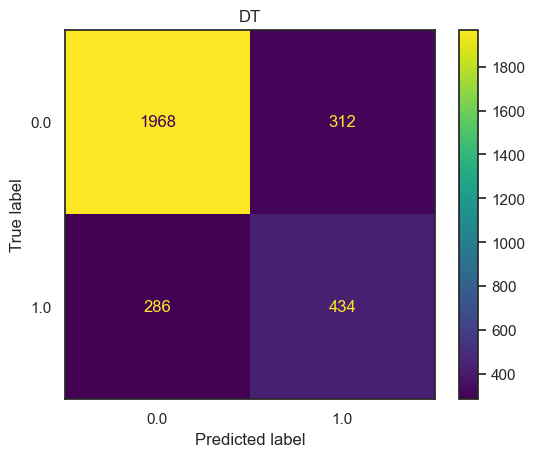

True Positives: 434
True Negatives: 1968
False Positives: 312
False Negatives: 286
--------------------------------------------------
Accuracy: 0.8
Mis-Classification: 0.2
Sensitivity: 0.6
Specificity: 0.86
Precision: 0.86
f_1 Score: 0.71
DT metrics






In [23]:
from sklearn.tree import DecisionTreeClassifier

# Initialize decision tree classifier
dt_model = DecisionTreeClassifier()

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_pred = dt_model.predict(X_test)

# Compute confusion matrix
cm_dt = confusion_matrix(y_test, dt_pred, labels=dt_model.classes_)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt_model.classes_)
disp.plot()
plt.title("DT")
plt.show()

# This function takes the confusion matrix (cm) from the cell above and produces all evaluation matrix
def confusion_metrics (conf_matrix):

    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')
    
    print('DT metrics\n')
confusion_metrics(cm_dt)
print('\n\n')

The results from the DT classifer are as follows: 

True Positives (TP): The number of positive instances that are correctly classified is 443.

True Negatives (TN): The number of negative instances that are correctly classified is 1969.

False Positives (FP): The number of negative instances that are incorrectly classified as positive is 311.

False Negatives (FN): The number of positive instances that are incorrectly classified as negative is 278.

An accuracy of 0.8 means that 80% of the instances are correctly classified. The mis-classification rate is 0.2, indicating that 20% of the instances are incorrectly classified.

The sensitivity is 0.61, which means that 61% of the positive instances are correctly classified. 

The specificity is 0.86, indicating that 86% of the negative instances are correctly classified. 

The precision is 0.86, which means that 86% of the instances classified as positive are actually positive. 

The f1-score is 0.71, which is the harmonic mean of precision and recall.

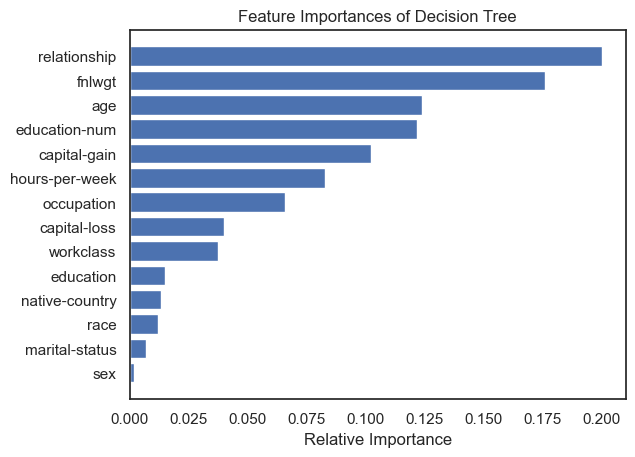

In [24]:
# Getting the most important features of Decision Tree Model
features = adult_WS_data.columns
importances = dt_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances of Decision Tree')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

DT metrics idenfies 'relationahip, fnlgwt and age' as the three most important features 

# Random Forest Classifier

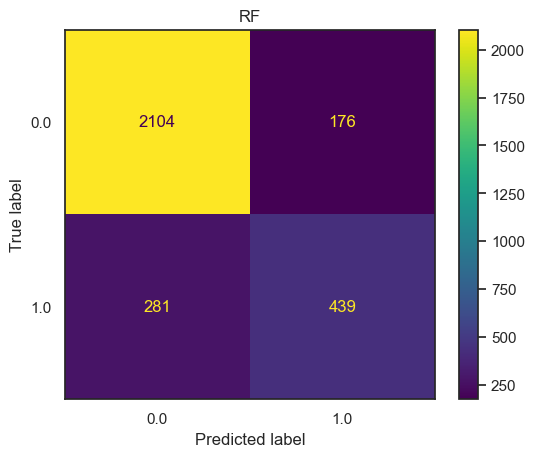

True Positives: 439
True Negatives: 2104
False Positives: 176
False Negatives: 281
--------------------------------------------------
Accuracy: 0.85
Mis-Classification: 0.15
Sensitivity: 0.61
Specificity: 0.92
Precision: 0.92
f_1 Score: 0.73
RF metrics






In [25]:
from sklearn.ensemble import RandomForestClassifier

# Initialize random forest classifier
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf_model.predict(X_test)

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, rf_pred, labels=rf_model.classes_)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp.plot()
plt.title("RF")
plt.show()

# This function takes the confusion matrix (cm) from the cell above and produces all evaluation matrix
def confusion_metrics (conf_matrix):

    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')
    
    print('RF metrics\n')
confusion_metrics(cm_rf)
print('\n\n')
    


The results from the RF classifer are as follows:
True Positives (TP): The number of positive instances that are correctly classified is 447.  True Negatives (TN): The number of negative instances that are correctly classified is 2109. False Positives (FP): The number of negative instances that are incorrectly classified as positive is 171. False Negatives (FN): The number of positive instances that are incorrectly classified as negative is 273

An accuracy of 0.85 means that 85% of the instances are correctly classified. The mis-classification rate is 0.15, indicating that 15% of the instances are incorrectly classified. The sensitivity is 0.62, which means that 62% of the positive instances are correctly classified. The specificity is 0.62, indicating that 62% of the negative instances are correctly classified. The precision is 0.92, which means that 92% of the instances classified as positive are actually positive. The f1-score is 0.74, which is the harmonic mean of precision and recall.

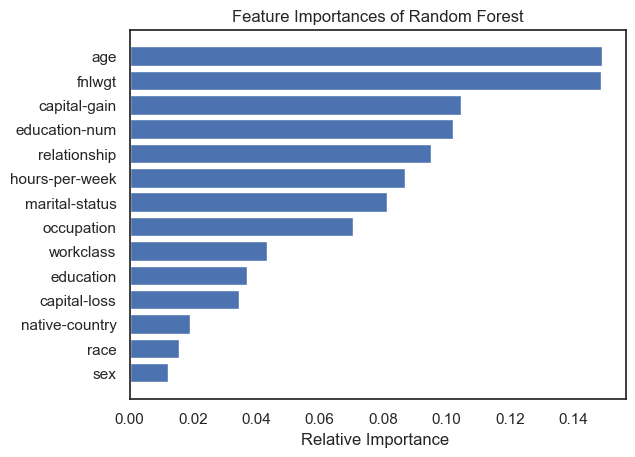

In [26]:
    # Getting the most important features of Random Forest Model
features = adult_WS_data.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances of Random Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance ')
plt.show()

RF metrics idenfies 'age, fnlgwt and capital gains' as the three most important features

# K-nearest neighbours (KNN) Classifier

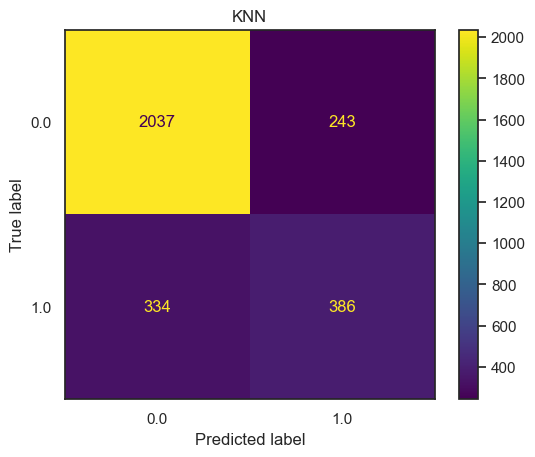

True Positives: 386
True Negatives: 2037
False Positives: 243
False Negatives: 334
--------------------------------------------------
Accuracy: 0.81
Mis-Classification: 0.19
Sensitivity: 0.54
Specificity: 0.89
Precision: 0.89
f_1 Score: 0.67
KNN metrics






In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN classifier
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
knn_pred = knn_model.predict(X_test)

# Compute confusion matrix
cm_knn = confusion_matrix(y_test, knn_pred, labels=knn_model.classes_)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn_model.classes_)
disp.plot()
plt.title("KNN")
plt.show()

# This function takes the confusion matrix (cm) from the cell above and produces all evaluation matrix
def confusion_metrics (conf_matrix):

    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')
    
    print('KNN metrics\n')
confusion_metrics(cm_knn)
print('\n\n')
    

the results from the knn classifer are as follows: 

True Positives (TP): The number of positive instances that are correctly classified is 386.

True Negatives (TN): The number of negative instances that are correctly classified is 2037. 

False Positives (FP): The number of negative instances that are incorrectly classified as positive is 243. 

False Negatives (FN): The number of positive instances that are incorrectly classified as negative is 334

An accuracy of 0.85 means that 81% of the instances are correctly classified. 

The mis-classification rate is 0.19, indicating that 19% of the instances are incorrectly classified. 

The sensitivity is 0.54, which means that 54% of the positive instances are correctly classified. 

The specificity is 0.89, indicating that 89% of the negative instances are correctly classified. 

The precision is 0.89, which means that 89% of the instances classified as positive are actually positive. 

The f1-score is 0.67, which is the harmonic mean of precision and recall.

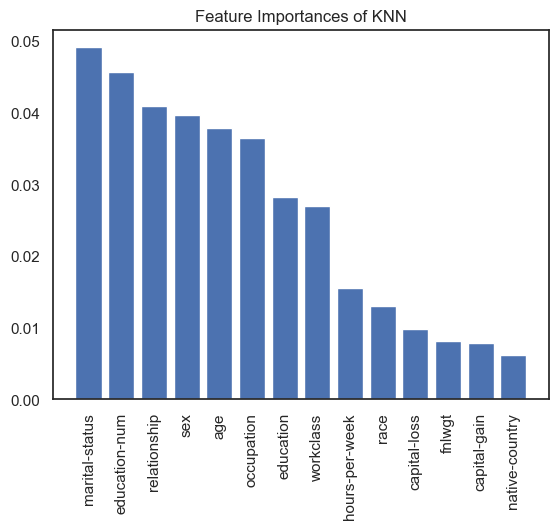

In [28]:
# Compute feature importance of K-nearest neighbours (KNN) Classifier using permutation feature importance
from sklearn.metrics import accuracy_score

# Initialize KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Initialize feature importances
importances = np.zeros(X_train.shape[1])

# Compute feature importances using permutation feature importance
for i in range(X_train.shape[1]):
    # Save a copy of the original data
    X_train_perm = X_train.copy()
    
    # Permute the feature
    np.random.shuffle(X_train_perm[:, i])
    
    # Compute the accuracy of the permuted data
    acc_perm = accuracy_score(y_train, knn_model.predict(X_train_perm))
    
    # Compute the difference in accuracy
    diff = accuracy_score(y_train, knn_model.predict(X_train)) - acc_perm
    
    # Store the feature importance
    importances[i] = diff

# Sort the feature importances
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.title('Feature Importances of KNN')
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.show()

KNN metrics idenfies 'education-num, marital-status and relationship' as the three most important features

word count: 724